In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [2]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
city_data_df.drop_duplicates('city')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Combine the data into a single dataset
pyber_master_data = pd.merge(city_data_df, ride_data_df, on='city')
# Display the data table for preview
pyber_master_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

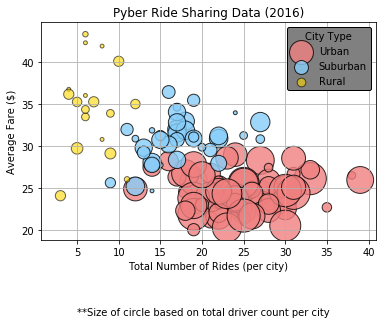

In [7]:
# Obtain the x and y coordinates for each of the three city types
#set index of city types, count number of rides
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

#descriptive statistics of data set, organized by city
avg_fare = pyber_master_data.groupby('city')['fare'].mean()
avg_fare.head()

total_rides = pyber_master_data.groupby('city')['ride_id'].count()
total_rides.head()

total_fare = pyber_master_data.groupby('city')['fare'].sum()
total_fare.head()

total_drivers = pyber_master_data.groupby('city')['driver_count'].mean()
total_drivers.head()

#create new dataframe to summarize scatterplots
pyber_data_frame = pd.DataFrame({"City Type": city_type,
                                 "Average Fare": avg_fare,
                                 "Total Fares": total_fare,
                                 "Number of Rides": total_rides,
                                 "Total Drivers": total_drivers})
#test new logic
#pyber_data_frame.head()

# Build the scatter plots for each city types
#filter by city types for scatterplot
urban = pyber_data_frame.loc[pyber_data_frame["City Type"] == "Urban"]
suburban = pyber_data_frame.loc[pyber_data_frame["City Type"] == "Suburban"]
rural = pyber_data_frame.loc[pyber_data_frame["City Type"] == "Rural"]

#scatter each filtered city type
plt.scatter(urban['Number of Rides'], urban['Average Fare'], color='lightcoral', edgecolors='black', s=urban['Total Drivers']*15, alpha=.8, label="Urban")
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], color = 'lightskyblue', edgecolors='black', s=suburban['Total Drivers']*15, alpha = .80, label="Suburban")
plt.scatter(rural['Number of Rides'], rural['Average Fare'], color='gold', edgecolors='black', s=rural['Total Drivers']*15, alpha=.60, label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")


# Create a legend
legend = plt.legend(title="City Type")
frame = legend.get_frame() #sets up for color, edge, and transparency
frame.set_facecolor('grey') #color of legend
frame.set_edgecolor('black') #edge color of legend
frame.set_alpha(1) #deals with transparency

# Incorporate a text label regarding circle size
plt.text(5,10,"**Size of circle based on total driver count per city")

# Save Figure
plt.savefig("Images/Pyber_Scatter.png")


plt.show()

## PIES

## Total Fares By City Type

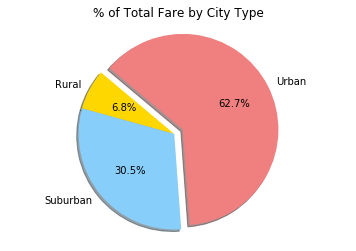

In [151]:
## Data Frame to build out pie charts
pyber_pies = pyber_master_data.copy()
fare_pies = pyber_pies.groupby('type')['fare'].sum()
fare_pies_t = pyber_pies['fare'].sum() 
fare_percentage = fare_pies/fare_pies_t

fare_pies_df = ({"Fares": fare_pies,
                 "Fare Percent":fare_percentage})

fare_pies_df
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.
explode = (0,0,0.1)

#label-maker
fare_pies.index

plt.pie(fare_pies_df['Fares'], labels=fare_pies.index, colors=colors, explode=explode, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Fare by City Type")


# Save Figure
plt.savefig("Images/Fare_City_Type.png")

plt.show()

## Total Rides by City Type

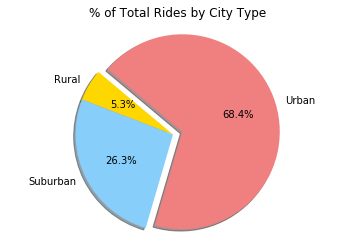

In [150]:
## Data Frame to build out pie charts
pyber_pies_2 = pyber_master_data.copy()
ride_pies = pyber_pies_2.groupby('type')['type'].count()
ride_pies_t = pyber_pies_2['fare'].sum() 
ride_percentage = ride_pies/ride_pies_t

ride_pies_df = ({"Rides": ride_pies,
                 "Ride Percent":ride_percentage})

ride_pies_df
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.
explode = (0,0,0.1)

#label-maker
ride_pies.index

plt.pie(ride_pies_df['Rides'], labels=fare_pies.index, colors=colors, explode=explode, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("Images/Ride_City_Type.png")

plt.show()

## Total Drivers by City Type

In [159]:
#DataFrame to build out pie charts

drivers = city_data_df.copy()
driver_count = drivers.groupby('type')['driver_count'].sum()
driver_count_t = drivers['driver_count'].sum()
driver_pct = driver_count/driver_count_t

driver_df = pd.DataFrame({"Drivers": driver_count})
driver_df

,Drivers
type,
Rural,78
Suburban,490
Urban,2405


In [156]:
driver_count.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

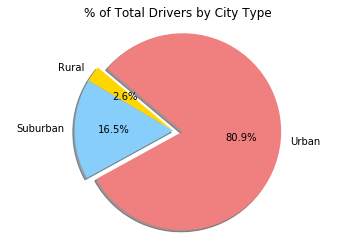

In [158]:
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.
explode = (0,0,0.1)

#label-maker
driver_count.index

plt.pie(driver_df['Drivers'], labels=driver_count.index, colors=colors, explode=explode, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("Images/Drivers_City_Type.png")

plt.show()

## Three Observations

In [3]:
print("1. The more rides a location has, the lower the average fare.  More drivers lowers the cost of the service, which is reiterated in the pie chart of total drivers byh city type.")
print("2. For a driver who may not want to drive full time for Pyber, working in the suburban or rural areas may be more profitable to them, since there is a significantly lower number of drivers, but still the opportunity ot make a good amount of money on a per fare basis.")
print("3. It is difficult to identify if any of the rides went between catgeories.  From the data, there is no way to say a fare started in a city and ended up in the suburbs.  Additionally, expanding the analysis to the time of day for the fare would be interesting.  In a more detailed analysis, identifying high volume destinations, such as airports, would be interesting, since often those locales are not in city centers.")

1. The more rides a location has, the lower the average fare.  More drivers lowers the cost of the service, which is reiterated in the pie chart of total drivers byh city type.
2. For a driver who may not want to drive full time for Pyber, working in the suburban or rural areas may be more profitable to them, since there is a significantly lower number of drivers, but still the opportunity ot make a good amount of money on a per fare basis.
3. It is difficult to identify if any of the rides went between catgeories.  From the data, there is no way to say a fare started in a city and ended up in the suburbs.  Additionally, expanding the analysis to the time of day for the fare would be interesting.  In a more detailed analysis, identifying high volume destinations, such as airports, would be interesting, since often those locales are not in city centers.
